In [1]:
import sys
sys.path.append("../library")

In [ ]:
from __future__ import print_function
from thinkbayes2 import Suite
import thinkplot

In [2]:
# perfectly balanced coin, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/euro.py
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x / 100.0
        else:
            return 1 - x / 100.0

In [3]:
def Summarize(suite):
    """
    Prints summary statistics for the suite.
    """
    # check if 50% probablity of balanced coin
    print(suite.Prob(50))
    # 1. Maximum Likelihood
    print('Maximum Likelihood: ', suite.MaximumLikelihood())
    # 2. Mean and Median
    print('Mean: ', suite.Mean())
    print('Median: ', suite.Percentile(50)) 
    print('5th: ', suite.Percentile(5)) 
    print('95th: ', suite.Percentile(95)) 
    # 3. Credible inverval
    print('Credible inveral', suite.CredibleInterval(90))

In [4]:
Hx = 101
suite = Euro(range(Hx))
dataset = 'H' * 140 + 'T' * 110
suite.UpdateSet(dataset)
Summarize(suite)
# if not include 50, then coin isn't perfectly balanced

0.020976526129544672
Maximum Likelihood:  56
Mean:  55.95238095238098
Median:  56
5th:  51
95th:  61
Credible inveral (51, 61)


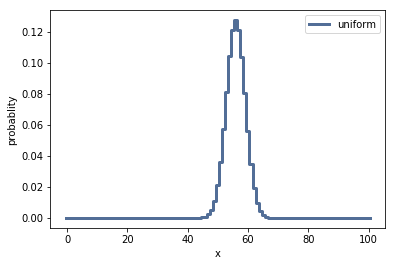

In [5]:
thinkplot.PrePlot(1)
thinkplot.Pmf(suite, label='uniform')
thinkplot.Show(xlabel='x', ylabel='probablity')